## Аналитика покупательского поведения на онлайн площадках с помощью методов Big Data

Анализ данного датасета покажет, как промокоды, скидки и цены влияют на то, какие вещи покупают и как часто покупают, а также влияют ли они на качество оказанной услуги

In [44]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
url = 'https://drive.google.com/u/0/uc?id=1i_KVrRBkK3kV4Ww5tmpN28Z_7GxJEccM'
df = pd.read_csv(url)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


### Описание переменных выборки:

* Customer ID - Уникальный идентификатор для каждого клиента

* Age - Возраст клиента

* Gender - Пол клиента (Male/Female)

* Item Purchased - Товар, приобретенный клиентом

* Category - Категория товара

* Purchase Amount (USD) - Сумма покупки в долларах США

* Location - Место, где была совершена покупка

* Size - Размер приобретенного товара

* Color - Цвет приобретенного товара

* Season - Сезон, в течение которого была совершена покупка

* Review Rating - Оценка, данная клиентом приобретенному товару

* Subscription Status - Указывает, есть ли у клиента подписка (Yes/No)

* Shipping Type - Тип доставки, выбранный клиентом

* Discount Applied - Указывает, была ли применена скидка к покупке (Yes/No)

* Promo Code Used - Указывает, использовался ли промо-код для покупки (Yes/No)

* Previous Purchases - Количество предыдущих покупок, совершенных клиентом

* Payment Method - Наиболее предпочтительный способ оплаты клиентом

* Frequency of Purchases - Частота, с которой клиент совершает покупки (e.g., Weekly, Fortnightly, Monthly)

## EDA

In [5]:
df.shape

(3900, 19)

In [6]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [8]:
df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


Исходный датафрейм состоит из 3900 строк и 19 столбцов, из них 14 хранят строковые значения, 4 - целочисленные и 1 - вещественные

In [10]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [11]:
df.duplicated().sum()

0

## Pandas profiling

In [12]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Shopping trends DataSet")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### График распределения по возрасту покупателей

In [42]:
def choose_segment(age):
    if age in range(18, 24):
        return '18-24'
    elif age in range(25, 34):
        return '25-34'
    elif age in range(35, 44):
        return '35-44'
    elif age in range(45, 54):
        return '45-54'
    elif age in range(55, 64):
        return '55-64'
    elif age in range(65, 70):
        return '65-70'

df['segment'] = df['Age'].apply(choose_segment)

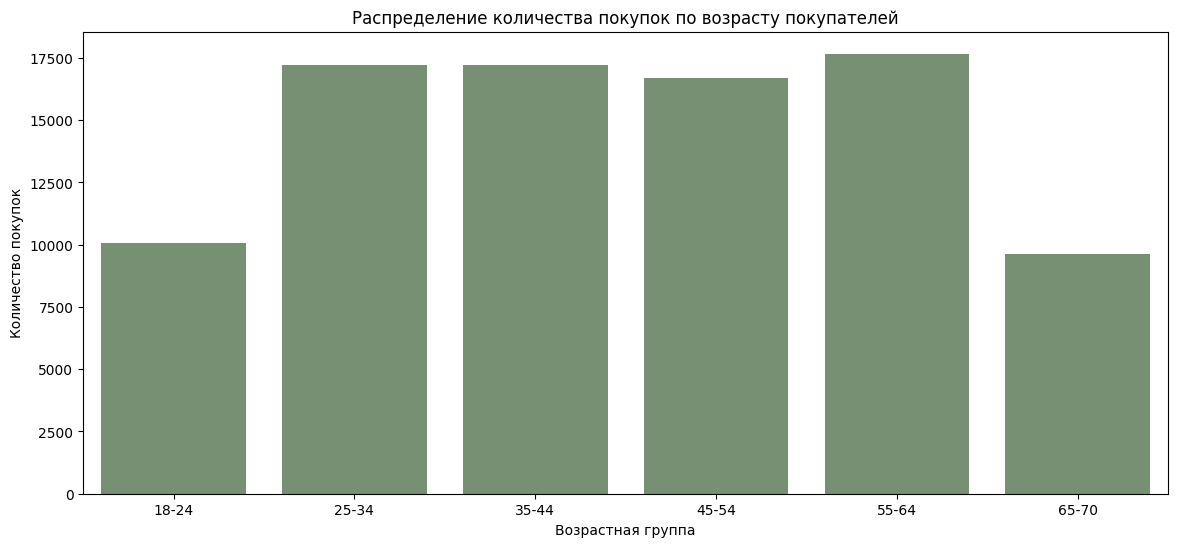

In [43]:
plt.figure(figsize=(14, 6))

age_purchases = df.groupby('segment')['Previous Purchases'].sum().reset_index()

sns.barplot(x='segment', y='Previous Purchases', data=age_purchases, color='#73956F')
plt.title('Распределение количества покупок по возрасту покупателей')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество покупок')
plt.show()

### График распределения по полу покупателей

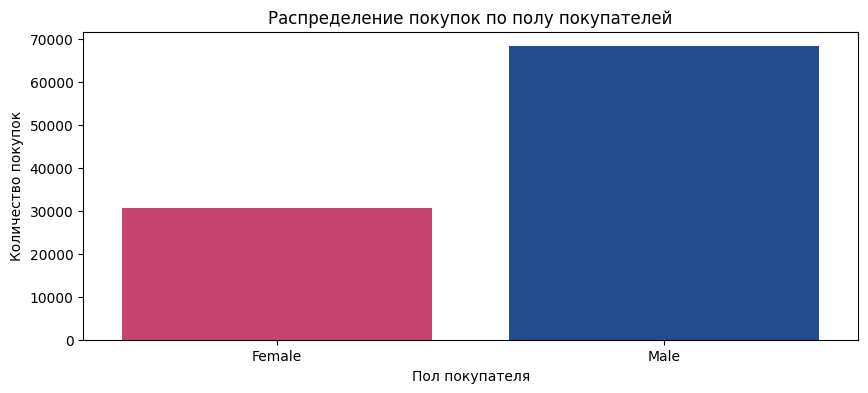

In [15]:
plt.figure(figsize=(10, 4))

colors = ['#DB3069', '#1446A0']

gender_purchases = df.groupby('Gender')['Previous Purchases'].sum().reset_index()

sns.barplot(x='Gender', y='Previous Purchases', data=gender_purchases, palette=colors)

plt.title('Распределение покупок по полу покупателей')
plt.xlabel('Пол покупателя')
plt.ylabel('Количество покупок')

plt.show()

### График распределения покупок по размеру товара

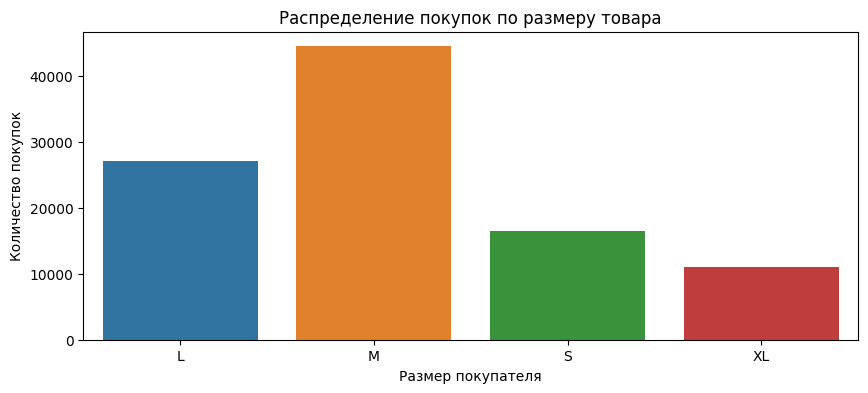

In [16]:
plt.figure(figsize=(10, 4))

size_purchases = df.groupby('Size')['Previous Purchases'].sum().reset_index()

sns.barplot(x='Size', y='Previous Purchases', data=size_purchases)

plt.title('Распределение покупок по размеру товара')
plt.xlabel('Размер покупателя')
plt.ylabel('Количество покупок')

plt.show()

### Предпочтительный способ оплаты покупок

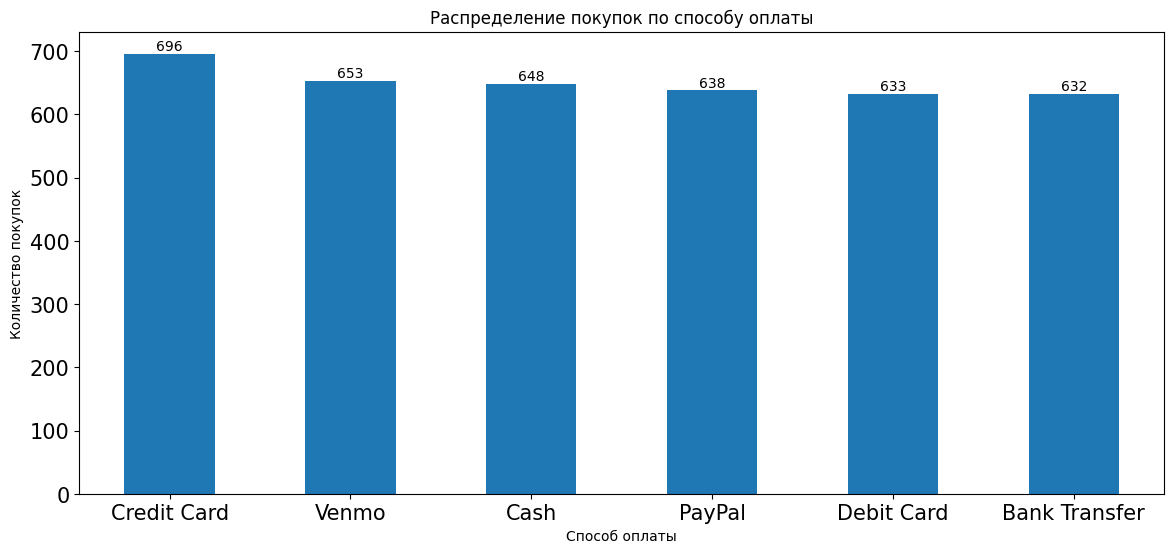

In [17]:
plt.figure(figsize=(14, 6))

ax = df["Payment Method"].value_counts().plot(kind = 'bar', rot = 0)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.title('Распределение покупок по способу оплаты')
plt.xlabel('Способ оплаты')
plt.ylabel('Количество покупок')

plt.show() 

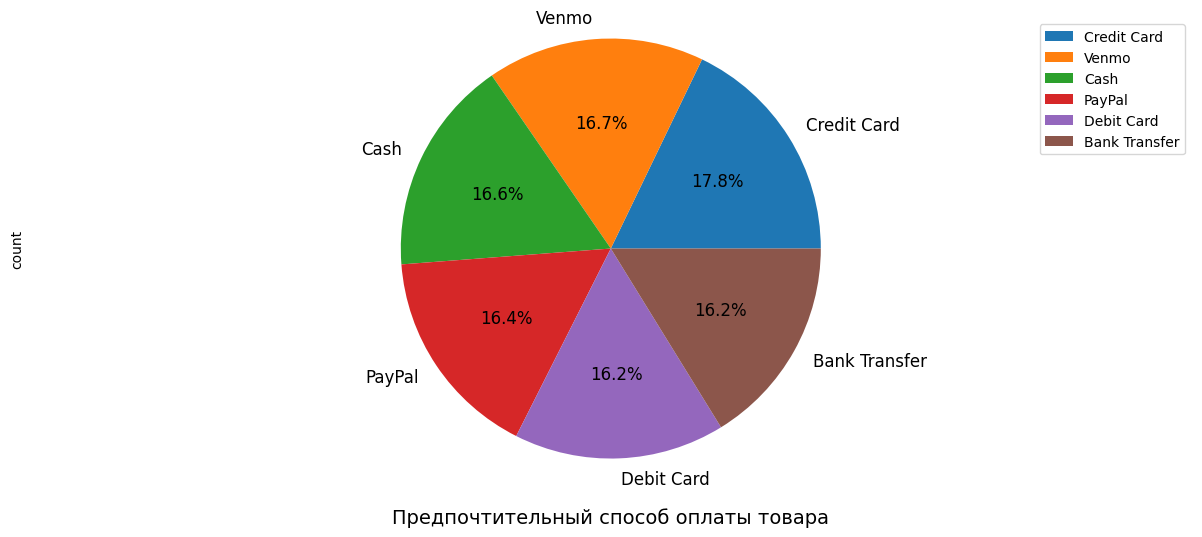

In [18]:
plt.figure(figsize = (15, 6))

counts = df["Payment Method"].value_counts()

counts.plot(kind = 'pie', fontsize = 12, autopct = '%1.1f%%')
plt.xlabel('Предпочтительный способ оплаты товара', fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### График распределения по категориям товаров

In [19]:
df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Text(0, 0.5, 'Количество покупок')

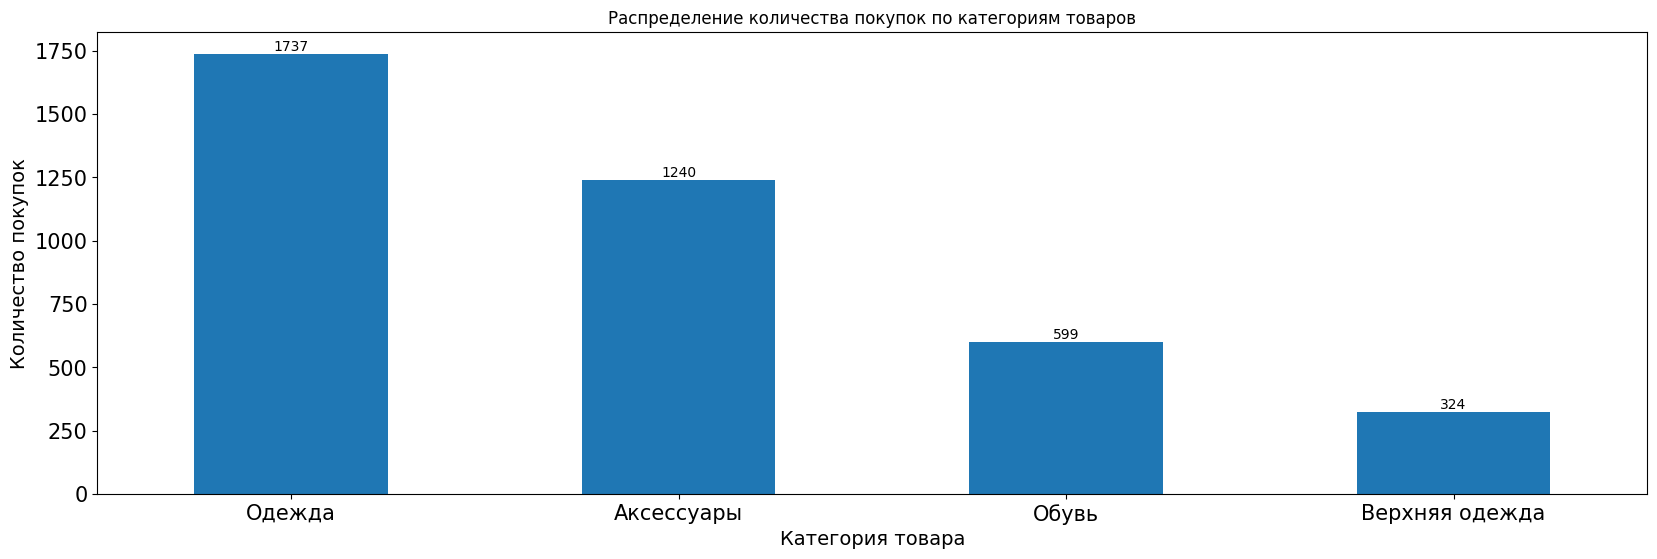

In [20]:
plt.figure(figsize = (20, 6))
ax = df["Category"].value_counts().plot(kind = 'bar', rot = 0)
ax.set_xticklabels(("Одежда", "Аксессуары", "Обувь", "Верхняя одежда"))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.title('Распределение количества покупок по категориям товаров')
plt.xlabel('Категория товара', fontsize = 14)
plt.ylabel('Количество покупок', fontsize = 14)

#### Диаграмма солнечных лучей по категориям товаров

In [21]:
import plotly
import plotly.express as px

category_p = df.groupby(['Category', 'Item Purchased']).size().reset_index(name='count')
category_p['percent'] = category_p['count'] / category_p['count'].sum() * 100

fig = px.sunburst(category_p, path=['Category', 'Item Purchased'], values='count')

fig.update_traces(textinfo='label+percent parent')

fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

### Разброс цен по каждой категории товара

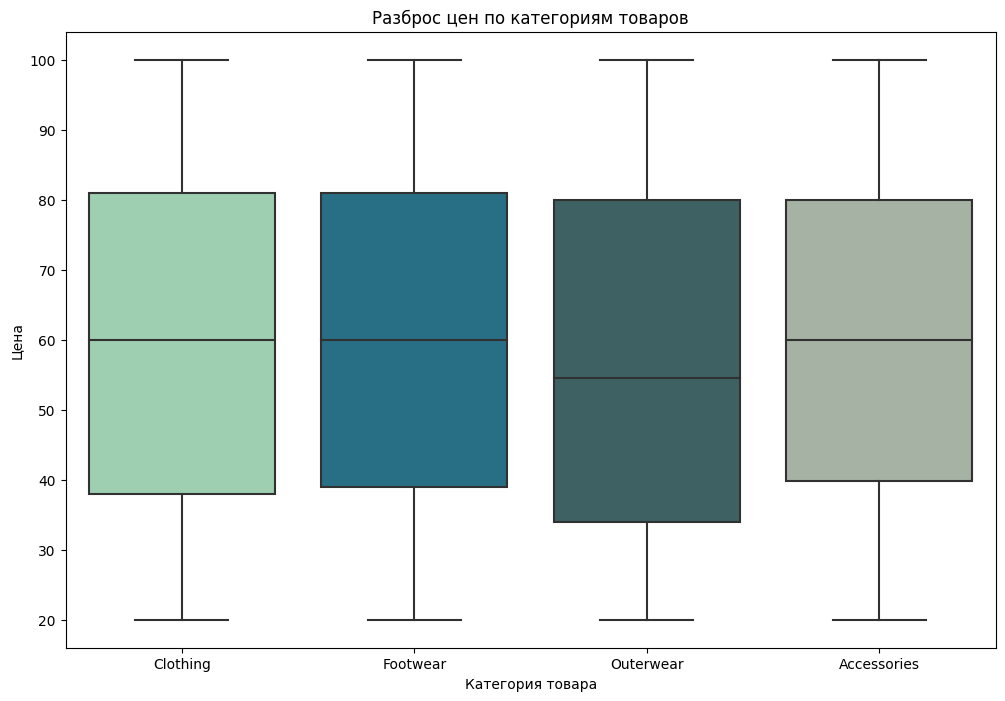

In [22]:
plt.figure(figsize=(12, 8))
colors = ['#95D7AE', '#187795', '#38686A', '#A3B4A2', '#73956F', '#7E8D85']
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df, palette=colors)
plt.title('Разброс цен по категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Цена')
plt.show()

### Разброс цен по сезонам, в течении которых была совершена покупка

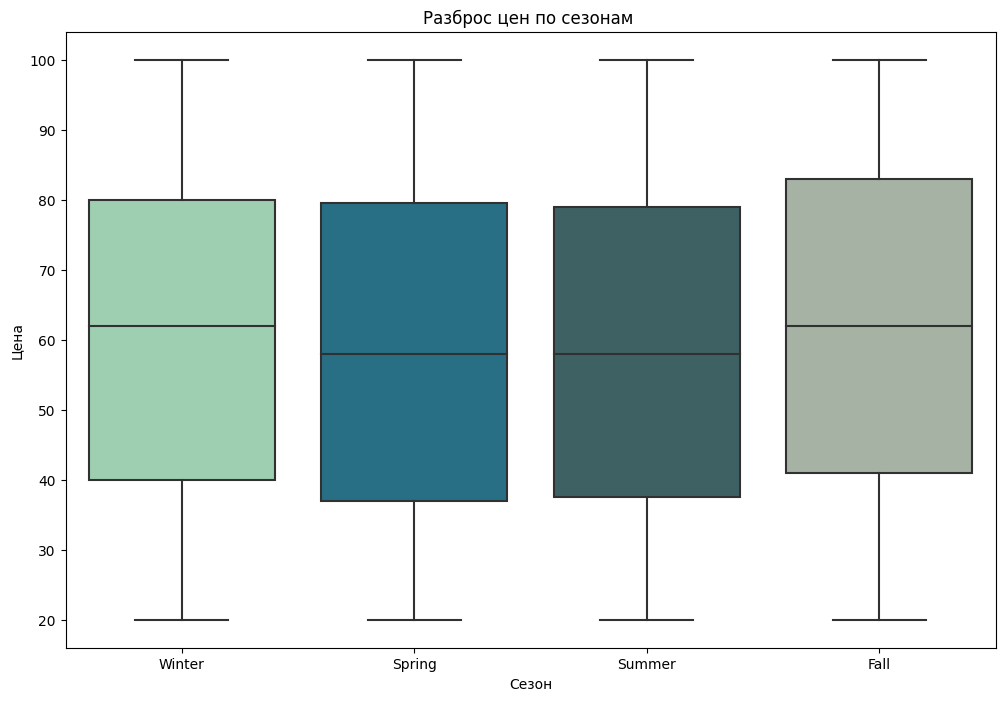

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df, palette=colors)
plt.title('Разброс цен по сезонам ')
plt.xlabel('Сезон')
plt.ylabel('Цена')
plt.show()

### Разброс цен по методу оплаты

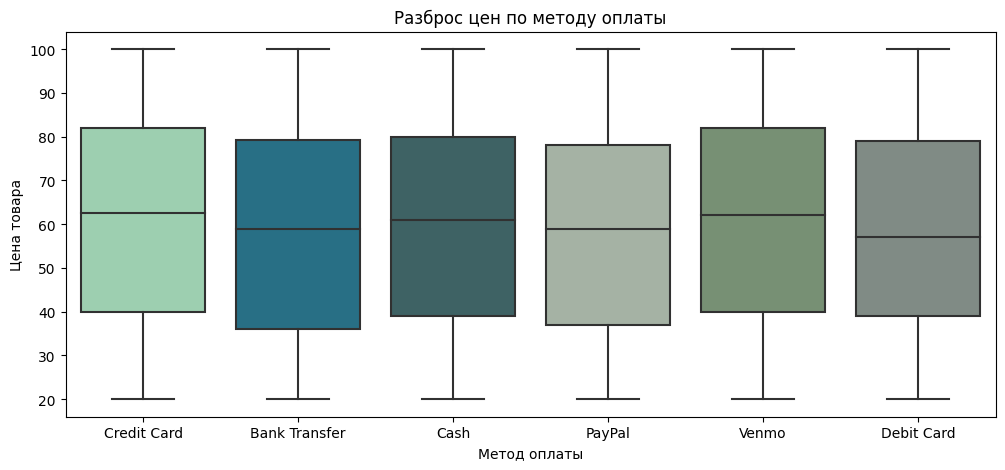

In [24]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', data=df, palette=colors)
plt.title('Разброс цен по методу оплаты')
plt.xlabel('Метод оплаты')
plt.ylabel('Цена товара')
plt.show()

### Частота применений скидок и промокодов

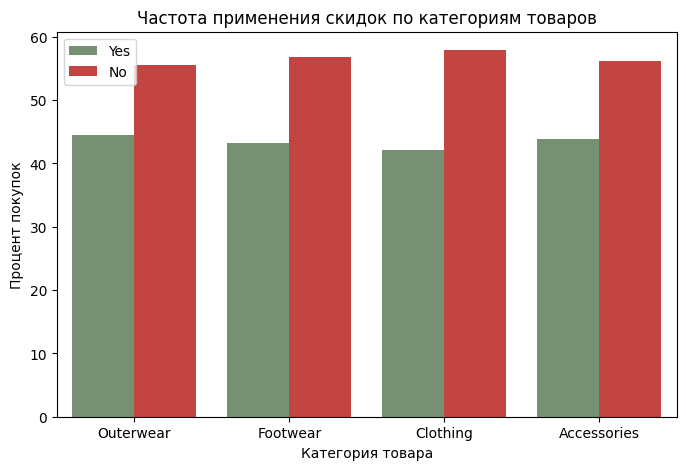

In [25]:
def count_percent(row):
    return (row['count'] / counts[row['Category']]) * 100

group = df.groupby(['Discount Applied', 'Category']).size().reset_index(name='count')
counts = group.groupby('Category')['count'].sum()
group['percentage'] = group.apply(count_percent, axis=1)

plt.figure(figsize=(8, 5))
colors = ['#73956F', '#D9312C']
sns.barplot(x='Category', y='percentage', hue='Discount Applied', data=group[::-1], palette=colors)
plt.title('Частота применения скидок по категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Процент покупок')
plt.legend(loc='upper left')

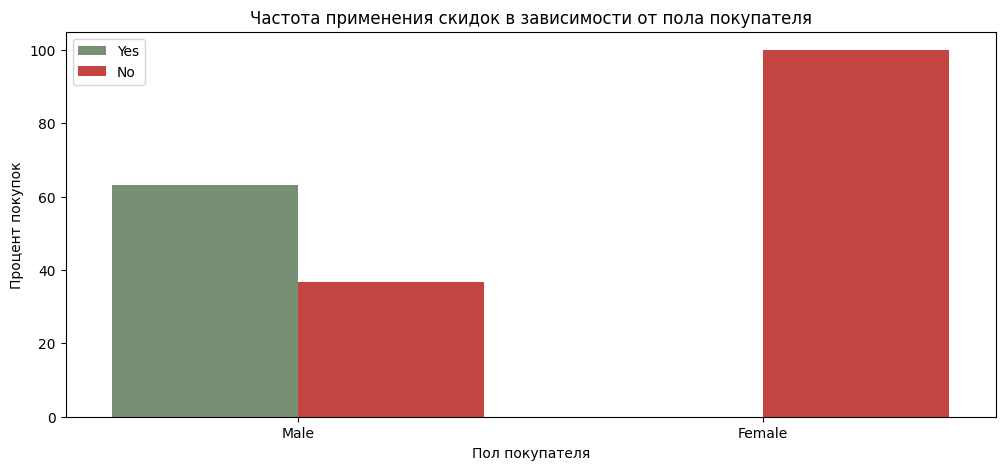

In [26]:
def count_percent(row):
    return (row['count'] / counts[row['Gender']]) * 100

group = df.groupby(['Discount Applied', 'Gender']).size().reset_index(name='count')
counts = group.groupby('Gender')['count'].sum()
group['percentage'] = group.apply(count_percent, axis=1)

plt.figure(figsize=(12, 5))
colors = ['#73956F', '#D9312C']
sns.barplot(x='Gender', y='percentage', hue='Discount Applied', data=group[::-1], palette=colors)
plt.title('Частота применения скидок в зависимости от пола покупателя')
plt.xlabel('Пол покупателя')
plt.ylabel('Процент покупок')
plt.legend()

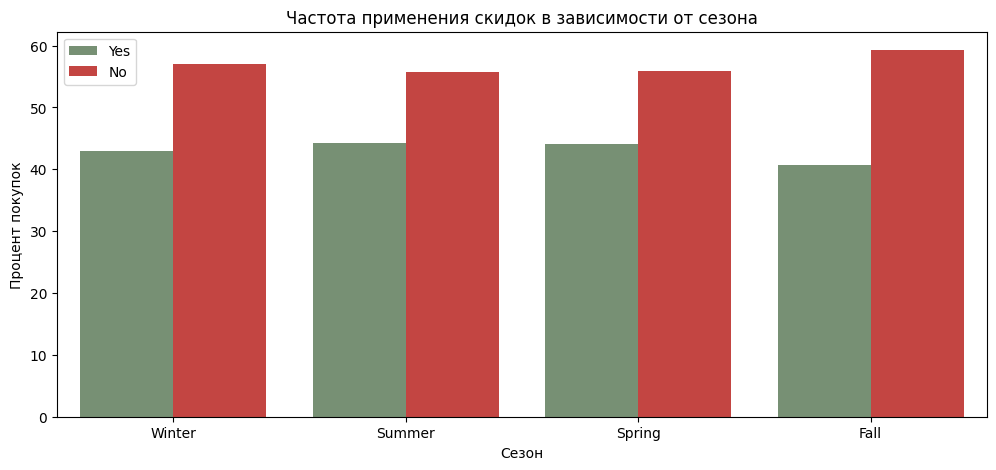

In [27]:
def count_percent(row):
    return (row['count'] / counts[row['Season']]) * 100

group = df.groupby(['Discount Applied', 'Season']).size().reset_index(name='count')
counts = group.groupby('Season')['count'].sum()
group['percentage'] = group.apply(count_percent, axis=1)

plt.figure(figsize=(12, 5))
colors = ['#73956F', '#D9312C']
sns.barplot(x='Season', y='percentage', hue='Discount Applied', data=group[::-1], palette=colors)
plt.title('Частота применения скидок в зависимости от сезона')
plt.xlabel('Сезон')
plt.ylabel('Процент покупок')
plt.legend()